### 1. Implement a basic ANN from scratch using TensorFlow. Train the network on the MNIST dataset (or CIFAR-10 for a more advanced approach) and evaluate the model's performance.
### 2. Construct a Convolutional Neural Network to classify images from the CIFAR-10 dataset. Include convolutional layers, pooling, and fully connected layers.
### 3. Compare results between the ANN and CNN models and provide visualizations (e.g., accuracy and loss curves).

## Step 1 : Importing all the necessary python packages :-

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

## Step 2 : Loading the CIFAR - 10 dataset : -

### **NOTE : CIFAR-10 Dataset is used to train both the Models**

In [ ]:
# Loading dataset :-
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Step 3  :  ANN Implementation : -


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

## 3.1 :   Defining the ANN Model :-

In [ ]:
# Defining the ANN model
ann_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 3.2 : Compiling the ANN Model : -

In [ ]:
# Compiling the model
ann_model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

## 3.3 : Training the ANN Model : -

In [ ]:
# Train the model
history_ann = ann_model.fit(x_train, y_train, epochs=10, batch_size=64,
                            validation_split=0.1, verbose=2)

Epoch 1/10
704/704 - 20s - 28ms/step - accuracy: 0.3215 - loss: 1.8812 - val_accuracy: 0.3742 - val_loss: 1.7355
Epoch 2/10
704/704 - 21s - 29ms/step - accuracy: 0.3957 - loss: 1.6842 - val_accuracy: 0.4180 - val_loss: 1.6496
Epoch 3/10
704/704 - 18s - 26ms/step - accuracy: 0.4260 - loss: 1.6073 - val_accuracy: 0.4002 - val_loss: 1.6943
Epoch 4/10
704/704 - 22s - 31ms/step - accuracy: 0.4451 - loss: 1.5531 - val_accuracy: 0.4144 - val_loss: 1.6399
Epoch 5/10
704/704 - 19s - 27ms/step - accuracy: 0.4668 - loss: 1.5004 - val_accuracy: 0.4372 - val_loss: 1.5672
Epoch 6/10
704/704 - 23s - 33ms/step - accuracy: 0.4749 - loss: 1.4693 - val_accuracy: 0.4586 - val_loss: 1.5456
Epoch 7/10
704/704 - 18s - 26ms/step - accuracy: 0.4892 - loss: 1.4317 - val_accuracy: 0.4630 - val_loss: 1.4972
Epoch 8/10
704/704 - 19s - 27ms/step - accuracy: 0.4958 - loss: 1.4129 - val_accuracy: 0.4926 - val_loss: 1.4493
Epoch 9/10
704/704 - 21s - 30ms/step - accuracy: 0.5056 - loss: 1.3871 - val_accuracy: 0.4784 - 


## Step 4 : CNN IMPLEMENTATION :-

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

## 4.1 : Defining the CNN Model :-

In [ ]:
# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 4.2 Compiling the CNN Model :-

In [13]:
# Compile the model
cnn_model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

## 4.3 Training the CNN Model :-

In [16]:
# Train the model
history_cnn = cnn_model.fit(x_train, y_train, epochs=10, batch_size=64,
                            validation_split=0.1, verbose=2)

Epoch 1/10
704/704 - 61s - 86ms/step - accuracy: 0.7989 - loss: 0.5741 - val_accuracy: 0.7168 - val_loss: 0.8444
Epoch 2/10
704/704 - 65s - 92ms/step - accuracy: 0.8100 - loss: 0.5405 - val_accuracy: 0.7226 - val_loss: 0.8553
Epoch 3/10
704/704 - 81s - 116ms/step - accuracy: 0.8243 - loss: 0.5011 - val_accuracy: 0.7220 - val_loss: 0.8605
Epoch 4/10
704/704 - 80s - 113ms/step - accuracy: 0.8373 - loss: 0.4615 - val_accuracy: 0.7146 - val_loss: 0.8962
Epoch 5/10
704/704 - 81s - 115ms/step - accuracy: 0.8467 - loss: 0.4336 - val_accuracy: 0.7264 - val_loss: 0.8938
Epoch 6/10
704/704 - 83s - 118ms/step - accuracy: 0.8588 - loss: 0.3968 - val_accuracy: 0.7216 - val_loss: 0.9365
Epoch 7/10
704/704 - 59s - 84ms/step - accuracy: 0.8668 - loss: 0.3762 - val_accuracy: 0.7270 - val_loss: 0.9241
Epoch 8/10
704/704 - 61s - 87ms/step - accuracy: 0.8788 - loss: 0.3435 - val_accuracy: 0.7222 - val_loss: 1.0062
Epoch 9/10
704/704 - 83s - 118ms/step - accuracy: 0.8872 - loss: 0.3218 - val_accuracy: 0.70

## Step 5 : Evaluating Both The Models : -


In [ ]:
# Evaluate ANN model :-
ann_loss, ann_accuracy = ann_model.evaluate(x_test, y_test, verbose=2)
print(f'ANN Test Accuracy: {ann_accuracy:.4f}')

# Evaluate CNN model :-
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f'CNN Test Accuracy: {cnn_accuracy:.4f}')

313/313 - 2s - 7ms/step - accuracy: 0.4836 - loss: 1.4655
ANN Test Accuracy: 0.4836
313/313 - 4s - 11ms/step - accuracy: 0.6916 - loss: 0.9317
CNN Test Accuracy: 0.6916


## Step 6 : Comparing the results of both the Models : -

In [ ]:
# Comparing the results :-
import matplotlib.pyplot as plt

## Step 7 : Plotting Accuracy for both the Models : -

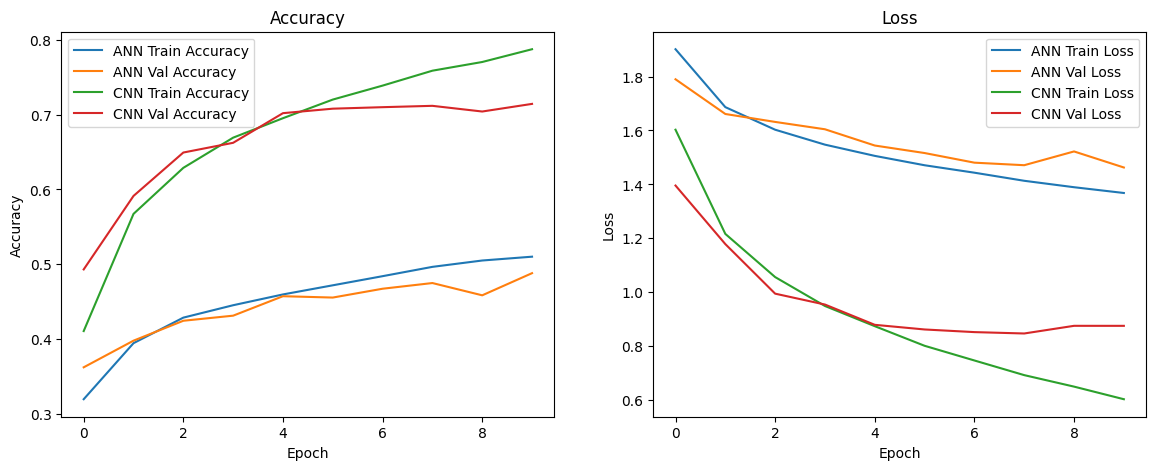

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_ann.history['accuracy'], label='ANN Train Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='ANN Val Accuracy')
plt.plot(history_cnn.history['accuracy'], label='CNN Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_ann.history['loss'], label='ANN Train Loss')
plt.plot(history_ann.history['val_loss'], label='ANN Val Loss')
plt.plot(history_cnn.history['loss'], label='CNN Train Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()